# Day 4 P1 - Algorithm

## Introduction

An algorithm is a step-by-step structured 'recipe' of calculations (operations) for solving a problem. 
Algorithms are important in computing because this is what computers do - perform structured 
sets of operations. To solve a problem using a computer we need an *algorithm*.

Our computer programs are the expression of algorithms in a computing language.
Almost everything you have done so far has been an algorithm. Now we want to identify
more carefully some algorithms, and how we can describe them. This is a step towards 
*algorithmic complexity*, which is in the next notebook.


## Characterising algorithms

There is usually more than one way to solve a problem, hence there will
usually be more than one algorithm to solve a given problem. Some algorithms may be fast but
inaccurate, others slow and accurate; some can be fast but use a lot of memory, while others may be 
low-memory but slower. Some will be simple to program, others much harder.
We will look more at characterising the performance of algorithms in the next notebook on 
*algorithmic complexity*.  For now we will focus on turning descriptions of algorithms 
into computer implementations.


## Objectives

- Develop appreciation of what an algorithm is
- Learn to create an algorithm to solve a problem
- Use *pseudocode* to describe algorithms

We will be using NumPy is this notebook, so we import it now:

In [1]:
import numpy as np

## Pseudocode

*Pseudocode* is commonly used to express algorithms. It involves presenting an algorithm in a way that
resembles a high-level programming language, like Python. Pseudocode is not formally defined, but uses 
control statements and loops that you are now familiar with.

In Activity 02, you worked on implementing a bisection algorithm. A presentation of a bisection algorithm
in pseudocode can be found at https://en.wikipedia.org/wiki/Bisection_method#Algorithm, which we reproduce here:

```
INPUT: Function f, endpoint values a, b, tolerance TOL, maximum iterations NMAX
CONDITIONS: a < b, either f(a) < 0 and f(b) > 0 or f(a) > 0 and f(b) < 0
OUTPUT: value which differs from a root of f(x)=0 by less than TOL 

N ← 1
While N ≤ NMAX # limit iterations to prevent infinite loop
  c ← (a + b)/2 # new midpoint
  If f(c) = 0 or (b – a)/2 < TOL then # solution found
    Output(c)
    Stop
  EndIf
  N ← N + 1 # increment step counter
  If sign(f(c)) = sign(f(a)) then a ← c else b ← c # new interval
EndWhile
Output("Method failed.") # max number of steps exceeded
```

Python syntax is close to a form of pseudocode, so we will generally present algorithms using Python syntax.
From an algorithm in pseudocode it is usually straightforward to produce a working Python program.

## Search

Some classic algorithms involve searching in a list.
Often, we need to know if a value exists in a list. We have already seen something like this with the Python built-in types, `dict` and `list` where we can say '`x in y`', e.g.:

In [2]:
# Create a list
y = [4, 2, 1, 3, 5]

# Check if '2' is in the list y
print(2 in y)

# Check if '2.5' is in the list y
print(2.5 in y)

True
False


Behind this syntax is an *algorithm* for performing the search. There are different ways to search, and the speed of a search can depend heavily on the algorithm. The speed of a given algorithm for a problem can depend on the nature of the data, how it is stored, and how many search operations we want to perform.

## Linear search

The simplest search is linear search, where we iterate over all entries in a list/tuple/dictionary, etc, and check for the value(s) we are looking for. Here is an example of searching if a given colour is in a list:

In [3]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

my_colours = ["yellow", "green", "blue", "orange", "purple"]

print(linear_search(my_colours, "blue"))
print(linear_search(my_colours, "black"))

True
False


This is a very simple algorithm. It is generally fast for short lists, but might not be the best approach for long lists.

## Binary search

Linear search does not place any requirements on the order of the data, i.e. on the list we are searching. 
However, if we have a list that is *sorted*, such as a list of names sorted into alphabetical order,
rather than using a linear search we can do something cleverer and perform a *binary search* (https://en.wikipedia.org/wiki/Binary_search_algorithm).

Binary search has similarities to bisection, that we have seen before. If we want to check if `y` is in 
the *sorted* array `x` of length `n`, we:

1. Check that the search value `y` is possibly in the array by checking that it lies between 
   the end values of `x`.
1. Set lower bound position to 0 and upper bound position to `n`-1
1. Evaluate the midpoint value of `x` , and determine if `y` lies to the left or right of 
   the mid-point.
   - if `y < x[mid]`, then set the upper bound position equal to the midpoint position - 1 
   - else if `y > x[mid]`, then set the lower bound position equal to the midpoint position + 1  
   - else if `y == x[mid]`, then we have found `y`, so return position `mid`
   - else if upper bound position < lower bound position, then `y` cannot be in the list, so return `None`

### Example

Consider the ordered array `x` of length 9:

| position  | 0 | 1 | 2 | 3 | 4  | 5  | 6  |  7 | 8  |
|-----------|---|---|---|---|----|----|----|----|-----
| value     | 2 | 5 | 7 | 8 | 32 | 34 | 47 | 52 | 61 |

We want to check if 52 is in the array, and if so in which position. The process is as follows: 

1. `upper=8, lower=0 -> midpoint=(8+0)/2=4` 
2. `x[8 (upper)]=61, x[0 (lower)]=2, x[4 (midpoint)]= 32 -> upper=8, lower=4+1=5, midpoint=(8+5)/2=6`  
3. `x[8 (upper)]=61, x[5 (lower)]=34, x[6 (midpoint)]= 47 -> upper=8, lower=6+1=7` 
4. `x[8 (upper)]=61, x[7 (lower)]=52 -> return 7 (position of 52)` 

### Implementation

A Python implementation of the binary sort algorithm is below. When implementing an algorithm, particular care needs to be taken with initialising values, updating at the appropriate points, and avoiding infinite loops.

In [4]:
def binary_search(x, y):
    "Peform binary search on x to find y. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If value is outside of interval, return None 
    if y < x[lower] or y > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] y lies, and update midpoint accordingly
        if y < x[midpoint]:
            upper = midpoint - 1
        elif y > x[midpoint]:
            lower = midpoint + 1
        elif y == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

We now add some tests to check that our algorithm is functioning correctly:

In [5]:
# Generate an array of sorted integers
x = np.array([-19, -15, -12,  -8,  -7,  -6,  -4 ,  1,  2,   8,   9,  15,  15,  18,  22])

# Test for values we know are in the array
assert binary_search(x, x[0]) == 0 
assert binary_search(x, x[2]) == 2 
assert binary_search(x, x[7]) == 7 
assert binary_search(x, x[14]) == 14 

# Test for values we know are outside the array interval
assert binary_search(x, -21) == None 
assert binary_search(x, 38) == None 

# Test for values we know are not in the array but are inside the array interval
assert binary_search(x, -11) == None
assert binary_search(x, 12) == None
assert binary_search(x, 21) == None

For large sorted arrays, binary search is much faster than linear search. We will look at this more in the next notebook. It does however rely on having a sorted array. If an array is unordered and we need to do a large number of searches, rather than using linear search it may be more efficient to first sort the array, and then use binary search.

## Sorting

Another classic algorithmic problem is sorting. There are numerous sort algorithms listed at https://en.wikipedia.org/wiki/Sorting_algorithm. The reason for multiple algorithms is that there is no universal *best*. The appropriate algorithm depends on the problem - maybe the size of the problem,
any pre-existing (partial) ordering, or even the CPU or memory (RAM) type.

We will consider two classic sorting algorithms - bubble sort and quicksort. Bubble sort is educational, 
and quicksort is widely used in practice.

## Bubble Sort

One of the simplest sorting algorithms is bubble sort. We just iterate over values in an array, and if any neighbours are in the wrong order we swap them. To sort the entire list, we have to repeat this process many times. 

Here is a pseudocode implementation of bubble sort:

```
procedure bubbleSort( A : list of sortable items )
    N ← length(A)
    repeat
       for i = 1 to N-1 inclusive do
          if A[i] > A[i+1] then
             swap(A[i], A[i+1])
          end if
       end for
       N ← N - 1
    until N = 0
end procedure
```

Note that this pseudocode assumes that the list `A` has entries indexed from `1` to `N`. 
This is because some languages, e.g. Fortran and MATLAB, use '1' for the index of the first entry in an array. Python, C, and numerous other languages use '0' as the index for the first entry in an array.
Because different languages have different conventions, it is important to pay attention to details like this when reading pseudocode. Mistakes due to 0-based or 1-based indexing are common, sufficiently so that there is a name for
such an error - 'off-by-one error'.

Below is an implementation of bubble sort in Python:

In [6]:
def bubble_sort(A):
    "Sort A and return"

    # Make a copy of A    
    A = A.copy()

    # Perform sorting    
    N = len(A)
    while N > 0:
        for i in range(N - 1):
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[i + 1]
        N = N - 1

    return A

We can test our bubble sort implementation with some random data:

In [7]:
# Generate array of 20 random values
x = np.random.rand(20)

# Sort array and print
print(bubble_sort(x))

[ 0.0782766   0.11877066  0.32608535  0.32828754  0.33855109  0.3768709
  0.4290344   0.59167161  0.59702207  0.60524349  0.70412282  0.75685884
  0.81246574  0.83179782  0.84838645  0.86806555  0.90310413  0.95785777
  0.9607331   0.96565575]


Bubble sort is not a sophisticated algorithm, and as we will see, it is very inefficient for large lists. But, it performs the task. Performance is not always a concern. We just need implementations that are sufficiently fast for a given application. If performance is not critical, clarity and simplicity of the code should be prized.

## Quicksort

A widely used algorithm for sorting, developed in 1959, is *quicksort*. It is known as a 'divide and conquer' type algorithm. It essentially picks a value in the array (the pivot), and partitions the entries into two groups; those less than the pivot and those greater than or equal to the pivot. It then repeats the process on each group. This make quicksort a *recursive* algorithm.

Below is the quicksort algorithm in pseudocode, taken from https://en.wikipedia.org/wiki/Quicksort#Lomuto_partition_scheme:

```
algorithm quicksort(A, lo, hi) is
    if lo < hi then
        p := partition(A, lo, hi)
        quicksort(A, lo, p – 1)
        quicksort(A, p + 1, hi)

algorithm partition(A, lo, hi) is
    pivot := A[hi]
    i := lo        // place for swapping
    for j := lo to hi – 1 do
        if A[j] ≤ pivot then
            swap A[i] with A[j]
            i := i + 1
    swap A[i] with A[hi]
    return i
```

The algorithm is started with `quicksort(A, 0, len(A)-1)`

We implement this now in Python:

In [8]:
import numpy as np
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        A = A.copy()
        hi = len(A) - 1

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

We do not want to focus on details of the quicksort algorithm, but do wish to highlight the close resemblance between the pseudocode and the Python implementation.

We now test the implementation for an array of random numbers:

In [9]:
x = np.random.rand(10)
print("Unsorted:", x)

y = quicksort(x)
print("Sorted:", y)

Unsorted: [ 0.14889195  0.58765106  0.49637314  0.5119816   0.92584391  0.51765015
  0.42630228  0.58902562  0.70662064  0.49293415]
Sorted: [ 0.14889195  0.42630228  0.49293415  0.49637314  0.5119816   0.51765015
  0.58765106  0.58902562  0.70662064  0.92584391]


## Sort performance 

Bubble sort and quicksort both sort arrays. So which is better? Let's test 
the performance on an array of 5,000 random numbers:

In [10]:
data = np.random.rand(5000)

We first time bubble sort, using the magic command [`%time`](Notebook%20tips.ipynb#Simple-timing) to get the execution time:

In [11]:
%time x = bubble_sort(data)

CPU times: user 5.46 s, sys: 12 ms, total: 5.48 s
Wall time: 5.49 s


And now quicksort:

In [12]:
%time x = quicksort(data)

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 26.7 ms


Clearly, quicksort is *much* faster than bubble sort. 

Finally, we test the NumPy quicksort function:

In [13]:
%time x = np.sort(data, kind='quicksort')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 708 µs


The NumPy implementation is considerably faster than our implementation of quicksort.

## Summary

We have looked at search and sorting as examples of algorithms.
Sometimes we need to write algorithms for a
specialised problem. However, for common algorithms like search and sorting always use the built-in/library versions. These will be faster and better tested.

# Day 4 P2 - Complexity

## Introduction

In the previous notebook we introduced algorithms as structured recipes for performing tasks. There are often different algorithms for performing the same task. We have seen this for root finding (bisection and Newton's method) and for sorting. We now want to analyse the performance of some algorithms, and in particular understand how the required time (or maybe the required memory) changes as the problem size increases. 
This is known as *algorithmic complexity*, and it helps us to pick an appropriate algorithm for a given problem, and to determine whether or not an algorithm will be able to solve a problem of a given size within an acceptable time.


## Objectives

- Understand 'big-oh' ($O$) notation
- Appreciate the consequences of algorithmic complexity
- Determine the complexity of some simple algorithms
- Measure complexity experimentally

**NOTE:** This notebook can take some time to execute as it performs timings for a selection of algorithms.

Before starting, we import NumPy and Matplotlib, and configure Matplotlib for the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Complexity and 'big Oh' notation

Consider a problem of size $n$ (if we were sorting an array of numbers, $n$ would be the length of the array).
For many algorithms, when $n$ is large we can express the time cost $t$ as:

$$
t = C g(n)
$$

where $C$ is a constant and $g$ is a function. If the cost can be expressed as above, where $C$ is a constant, then we write in 'big-Oh' notation:

$$
t = O(g(n))
$$

We consider some common expressions for $g(n)$.


## Constant

For an algorithm that is *constant in time*, we have $t = O(1)$. This means that the time required for the algorithm is *independent* of the problem size $n$. An example of an $O(1)$ algorithm is accessing an entry in an array.


## Polynomial

For an algorithm that is *polynomial in time*, we have 

$$
t = O(n^k)
$$

where $k \ge 1$ is a constant (it does not have to be an integer). Common cases are:

- $O(n)$: linear complexity
- $O(n^2)$: quadratic complexity
- $O(n^3)$: cubic complexity


## Logarithmic

For an algorithm that is *logarithmic in time*, we have $t = O(\log n)$.


## Loglinear 

A number of important algorithms are *log-linear in time*, that is $t = O(n\log n)$.
Perhaps the most famous $O(n\log n)$ algorithm is the fast Fourier transform (FFT).


## Exponential 

Some algorithms are *exponential in time*, that is $t = O(c^{n})$, where $c \ge 1$. Clearly such algorithms
become extremely expensive for large $n$; they are generally of little or no practical use.

## Impact of complexity

To develop a sense of different complexities, below we compute a table of the $g(n)$ terms for common
complexities (study the code if you wish, but it's not required). 
Remember that the required time is proportional to $g(n)$, so we are interested in the relative change as we increase $n$. 

In [2]:
import math
N = (10, 100, 1000, 10000, 100000, 1000000)
functions = (("1", lambda n: 1), 
             ("n", lambda n: n/N[0]), 
             ("n**2", lambda n: n**2/N[0]**2), 
             ("n**3", lambda n: n**3/N[0]**3), 
             ("log(n)", lambda n: math.log(n)/math.log(N[0])), 
             ("nlog(n)", lambda n: n*math.log(n)/(N[0]*math.log(N[0]))))


# Create table header
header = "{:<9}| ".format("n")
for f in functions:
    header += "{:<16}".format(f[0])
print(header)

# Print divider
print("-"*len(header))

# Print rows
for n in N:
    row = "{:<9}| ".format(n)
    for f in functions:
        row += "{:<16.4e}".format(f[1](n))
    print(row)

n        | 1               n               n**2            n**3            log(n)          nlog(n)         
-----------------------------------------------------------------------------------------------------------
10       | 1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      1.0000e+00      
100      | 1.0000e+00      1.0000e+01      1.0000e+02      1.0000e+03      2.0000e+00      2.0000e+01      
1000     | 1.0000e+00      1.0000e+02      1.0000e+04      1.0000e+06      3.0000e+00      3.0000e+02      
10000    | 1.0000e+00      1.0000e+03      1.0000e+06      1.0000e+09      4.0000e+00      4.0000e+03      
100000   | 1.0000e+00      1.0000e+04      1.0000e+08      1.0000e+12      5.0000e+00      5.0000e+04      
1000000  | 1.0000e+00      1.0000e+05      1.0000e+10      1.0000e+15      6.0000e+00      6.0000e+05      


The $g(n)$ terms have been normalised using $g(10)$ so we can compare more easily the different cases.
The table highlights the dramatic increase in cost for the $n^{2}$ and $n^{3}$ cases as $n$ becomes larger. 
Algorithms with lower complexity, e.g. $\log(n)$, $n$ and $n\log(n)$, are much more appealing.

We have discussed complexity in terms of time - how long an algorithm would take to execute - but we could also have discussed complexity in terms of *space* (memory). It can be important to know how the computer memory required by an algorithm will change with problem size.

## Determining complexity

To determine the complexity of an algorithm, we just need to count the number of operations. 
If we have an array `x` of length $n$, and multiply it by a scalar $a$:

In [3]:
n = 100000
x = np.random.rand(n)

a = 10.0
for i in range(n):
    x[i] = a*x[i]

The cost of the operation ` x[i] = a*x[i]` is $O(1)$ and it is performed $n$ times, so overall the cost is $O(n)$.

If we have a $m \times n$ matrix and multiply it by the scalar $a$:

In [4]:
m = 500
n = 1000
A = np.random.rand(m, n)

a = 10.0
for i in range(m):
    for j in range(n):
        A[i, j] = a*A[i, j]

For each `i`, the loop over `j` is executed $n$ times (cost is $O(n)$ for each `i`), and we loop over
`i` $m$ times. Hence this is a $O(mn)$ operation. For a square matrix ($m = n$) the complexity is $O(n^{2})$.

Typical operations on $n \times n$ matrices have complexity that is higher than $O(n)$, so operations on large matrices can be very expensive and algorithms need to be chosen carefully when $n$ is large.

The above examples are straightforward as they do not depend on the data that is stored in the 
vector or matrix - the number of operations depends *only* on the problem size $n$. For other algorithms, 
such as search and sorting, the complexity can depend on the initial data. In these cases, 
when assessing an algorithm we consider:

- Best case complexity
- Worst case complexity
- Average case complexity

When an algorithm is presented, the above complexities are often given together with the conditions under
which each case is met. We will see examples of best and worst case complexities below.

### Cost of operations

We will assume that the cost of operations such as addition, subtraction, multiplication and division is $O(1)$, i.e. a constant. You might find in some algorithm books that the cost of an operation depends on the number of digits in a number. This is only relevant for extremely large numbers, beyond what we encounter in normal scientific and engineering applications.

## Search

In the previous notebook we looked at linear and binary search. We now want to consider the complexity
and test it experimentally.


## Linear search

With linear search we iterate over an array looking for a particular value.
If we are lucky, the value we are searching for will be in the first few places of the array, in which case the complexity will be $O(1)$ - it does not depend on the array length. If the value is not in the array, we have to check every entry to verify this. The array has $n$ entries, so this has complexity $O(n)$. If the array does contain the value we are looking for, maybe on average it will be in the middle, so we have to perform $n/2$ checks on average. Since we are not interested in the constant term ($1/2$), the complexity for this case 
(average case) is $O(n)$.  This leads us to the following complexities for linear search:

- Best case: $O(1)$
- Worst case: $O(n)$
- Average case: $O(n)$


## Binary search

Binary search (covered in the previous notebook) has complexity:

- Best case: $O(1)$
- Worst case: $O(\log n)$
- Average case: $O(\log n)$

For large $n$, binary search is *much* faster than linear search.

Despite the differences in complexity, for small problems linear search is faster than binary search. This is because the 'proportionality' constant ($C$) is smaller for linear search. A reason is that modern processors are optimised for moving over data in arrays in sequence - they exploit the processor *cache*, which is small but fast memory that is located on the CPU.

## Comparing search performance

To verify the complexities for linear and binary search, we can test the performance experimentally using the
implementations from the previous notebook. We start with linear search:

In [5]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

We will test the complexity by searching for a value in arrays of increasing length, and timing how long it takes. We will use the magic function [`%timeit`](Notebook%20tips.ipynb#Detailed-timing) to get the execution time. 

In [6]:
# Create array of problem sizes n we want to test (powers of 2)
N = 2**np.arange(2, 18)

# Generate the array of integers for the largest problem
x = np.arange(N[-1])

# Initialise an empty array to stores times
times = []

# Time the search for each problem size
for n in N:

    # Time search function (repeating 3 times) to find a random integer in x[:n]
    t = %timeit -q -n4 -r1 -o linear_search(x[:n], np.random.randint(0, n))

    # Store best case time
    times.append(t.best)

We now plot the time as a function of problem size, on a log-log scale:

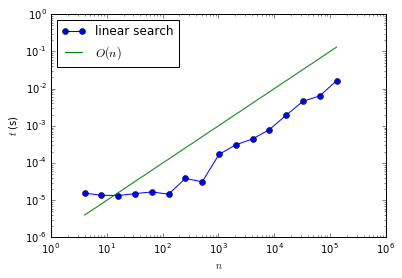

In [8]:
# Plot and label the time taken for linear search
plt.loglog(N, times, marker='o', label='linear search')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Add legend
plt.legend(loc=0)

plt.show()

As expected, we see that as $n$ increases the time required is proportional to $n$.

We repeat this experiment, but this time for binary search. Here is the search function from the previous notebook:

In [9]:
def binary_search(x, val):
    "Peform binary search on x to find val. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If values is outside of interval, return None 
    if val < x[lower] or val > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] val lies, and update midpoint accordingly
        if val < x[midpoint]:
            upper = midpoint - 1
        elif val > x[midpoint]:
            lower = midpoint + 1
        elif val == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

Binary sort is much faster than linear search, so we need to test it for larger arrays than we did for linear search.

In [10]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 24)

# Creat array and sort
x = np.arange(N[-1])
x = np.sort(x)

# Initlise an empty array to capture time taken
times = []

# Time search for different problem sizes
for n in N:
    # Time search function for finding '2'
    t = %timeit -q -n5 -r2 -o binary_search(x[:n], 2)

    # Store average
    times.append(t.best)

We expect $O(\log n)$ complexity, so we will use a log scale for $n$ and a linear scale for time $t$:

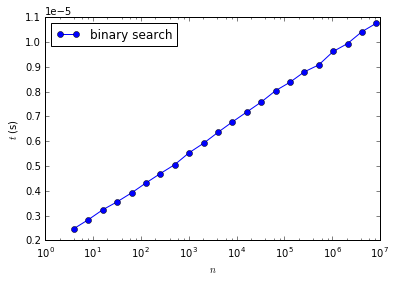

In [11]:
# Plot and label the time taken for binary search
plt.semilogx(N, times, marker='o', label='binary search')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Add legend
plt.legend(loc=0);

# Change format on y-axis to scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

You should see a line that is close to linear, i.e. binary search is $O(\log(n))$.
Binary search is so fast that it can be hard to get good timings 
for small problems because noise, caused by things like other processes running on a computer, can be significant.

## Sorting

Suppose we want to sort a random sequence into ascending order. This is a very common and extensively studied problem. There are over 40 sort algorithms listed on [Wikipedia](https://en.wikipedia.org/wiki/Sorting_algorithm). 
Which one do we pick? Let's test bubble sort and quicksort to see how they perform.

## Bubble sort

We introduced bubble sort in the previous notebook. For an array of length $n$, it involves iterating over 
all entries and performing swaps. This has cost $O(n)$. We then repeat this $n$ times. Hence, bubble sort
has complexity $O(n^{2})$.

Below is the bubble sort implementation from the previous notebook:

In [12]:
def bubble_sort(A):
    "Sort A and return"
    A = A.copy()
    n = len(A)
    while n > 0:
        for i in range(n - 1):
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[i + 1]
        n = n - 1

    return A

We can determine the complexity of bubble sort by inspecting the code.
It involves a *nest* of two loops (a `while` and a `for` loop), and each is executed $n-1$ times. Swapping the data is $O(1)$ (no dependency on $n$), hence the complexity for the whole algorithm is $O(n^{2})$.

Let's time the algorithm for increasingly large arrays. 

In [13]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 10)

# Create an array of random numbers
x = np.random.rand(N[-1])

# Time bubble sort on arrays of different lengths  
times = []
for n in N:
    t = %timeit -q -n2 -r2 -o bubble_sort(x[:n])
    times.append(t.best)

We now plot the bubble sort time against the size of the array on a log-log plot, and compare against a $O(n^{2})$ line:

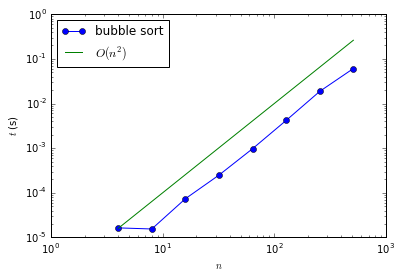

In [14]:
# Plot bubble sort timing
plt.loglog(N, times, marker='o', label='bubble sort')

# Show reference line of O(n^2)
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

It is clear that for bubble sort that $t \propto n^2$ -  we are observing the $O(n^2)$ complexity. 
This makes bubble sort too expensive for large $n$ to be of practical use.

## Quicksort

Analysing the complexity of quicksort is not as simple at the preceding algorithms, so we will state it and test
it experimentally. Quicksort has complexities:

- Best case: $O(n\log n)$
- Worst case: $O(n^{2})$
- Average case: $O(n\log n)$

The worst case complexity occurs when the data is already sorted. 

We reproduce here the quicksort algorithm from the previous notebook so we can test its complexity.

In [15]:
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        hi = len(A) - 1
        A = A.copy()

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

We gather timings for quicksort to sort an array of random numbers:

In [16]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)

# Create an array of random numbers
x = np.random.rand(N[-1])

# Time quicksort on arrays of different lengths
times = []
for n in N:
    t = %timeit -n1 -r1 -o -q quicksort(x[:n])
    times.append(t.best)

Plotting the results, with a $O(n\log(n))$ line as a reference:

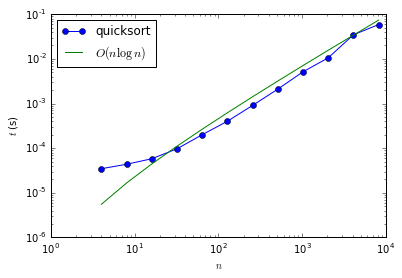

In [17]:
# Plot quicksort timings
plt.loglog(N, times, marker='o', label='quicksort')

# Show reference line of O(n*log(n))
plt.loglog(N, 1e-6*N*np.log(N), label='$O(n\log\, n)$')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

We observe here the $O(n\log n)$ complexity.

### Worst case complexity

We can reproduce the quicksort worst-case complexity, which is $O(n^{2})$, by pre-sorting an array. Since an $O(n^{2})$ algorithm will be much more expensive than $O(n\log(n))$ for large $n$, we will test for smaller problems:

In [18]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)

# Create array of random numbers and pre-sort
x = np.random.rand(N[-1])
x = np.sort(x)

# Quicksort is recursive, but by deafult Python raises an exeption if the number
# of recursions is high (to avoid crashes due to accidental infinite recursion loops),
# so we need to increase the limit
import sys
sys.setrecursionlimit(25000)

times = []
for n in N:
    t = %timeit -n1 -r1 -o -q quicksort(x[:n])
    times.append(t.best)

Plotting the timing results:

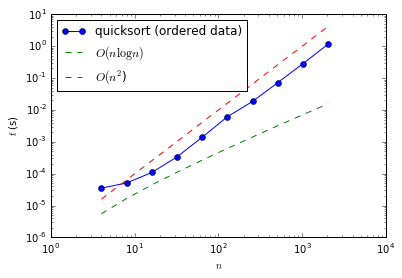

In [19]:
# Plot quicksort timings
plt.loglog(N, times, marker='o', label='quicksort (ordered data)')

# Plot nlog(n) line for reference
plt.loglog(N, 1e-6*N*np.log(N), '--', label=r'$O(n\log n)$')

# Show reference line of O(n^2)
plt.loglog(N, 1e-6*N**2, '--', label=r'$O(n^2$)')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

As expected, we observe $O(n^{2})$ complexity for the pre-sorted case - we have reproduced the worst-case scenario.

## Library sort implementations

It is interesting to see how library (built-in) sorting implementations compare to our implementations.
The built-in Python function `sorted` is an implementation of Timsort (https://en.wikipedia.org/wiki/Timsort).
We compare the performance of `sorted` and `numpy.sort` (using quicksort) to our quicksort implementation:

In [20]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)
 
# Create an array of random numbers, and make read-only so we don't accidentally sort it    
x = np.random.rand(N[-1])
x.flags.writeable = False

# Time the different implementations
our_times = []
py_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o quicksort(x[:n])
    our_times.append(t.best)
    
    # Time Python built-in sort
    t = %timeit -n3 -q -o sorted(x[:n])
    py_times.append(t.best)

    t = %timeit -n3 -q -o np.sort(x[:n], kind='quicksort')
    np_times.append(t.best)

We now plot the results:

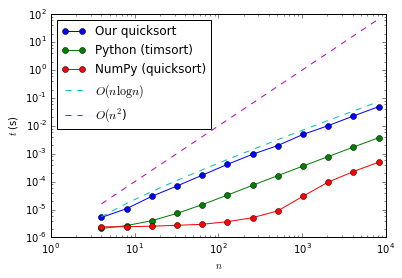

In [21]:
# Plot time taken for quicksort of our implementation
plt.loglog(N, our_times, marker='o', label='Our quicksort')

# Plot time taken for built-in sort
plt.loglog(N, py_times, marker='o', label='Python (timsort)')
plt.loglog(N, np_times, marker='o', label='NumPy (quicksort)')

# Show reference lines of O(n*log(n)) and  O(n^2)
plt.loglog(N, 1e-6*N*np.log(N), '--', label=r'$O(n\log n)$')
plt.loglog(N, 1e-6*N**2, '--', label=r'$O(n^2$)')

# Show legend
plt.legend(loc=0);

# Add label and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

We can see that all three implementations have $O(n\log(n))$ complexity, but there are large differences in speed (keep in mind the log scale). Our implementation is by far the slowest!

Repeating this test on sorted data:

In [22]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
 
# Create an array of random numbers and sort    
x = np.random.rand(N[-1])
x.sort()

# Time the different implementations
our_times = []
py_times = []
np_times = []
for n in N:
    # Time our quicksort implememtation
    t = %timeit -n3 -q -o quicksort(x[:n])
    our_times.append(t.best)
    
    # Time Python built-in sort
    t = %timeit -n3 -q -o sorted(x[:n])
    py_times.append(t.best)

    t = %timeit -n3 -q -o np.sort(x[:n], kind='quicksort')
    np_times.append(t.best)

Plotting the times:

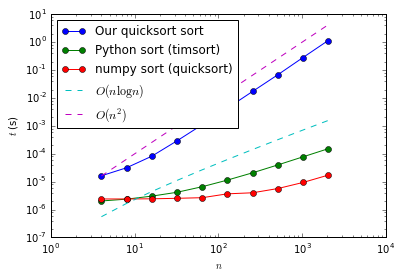

In [23]:
# Plot time taken for quicksort of our implementation
plt.loglog(N, our_times, marker='o', label='Our quicksort sort')

# Plot time taken for built-in quicksort
plt.loglog(N, py_times, marker='o', label='Python sort (timsort)')
plt.loglog(N, np_times, marker='o', label='numpy sort (quicksort)')

# Show reference line of O(n*log(n)) and O(n^2)
plt.loglog(N, 1.0e-7*N*np.log(N), '--', label=r'$O(n \log n)$')
plt.loglog(N, 1.0e-6*N**2, '--',  label=r'$O(n^2)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

Note that our implementation exhibits $O(n^2)$ complexity, while the NumPy quicksort implementation is
$O(n\log(n))$. Quality implementations have heuristics to avoid the worst-case complexity.
Timsort has worst-case complexity of $O(n\log n)$.

## Summary

Complexity is important as it tells how the cost of an algorithm will increase as problem size increases. For large problems, it is important to select and/or develop algorithms with low complexity.

We have focused on time complexity, but remember there is also *space complexity*, which is how the required memory changes with problem size. If you have a device with limited memory, you might favour an algorithm with low space complexity.

# Day 4 P3 - Object-oriented Programming

# Introduction

Object-oriented programming and design is an approach that is based around 'objects'. 
You have already been working
regularly with objects such as lists, tuples, dictionaries, and NumPy arrays.

The topic of object-oriented programming is a whole lecture course on its own, so in this notebook 
we will focus on:

- Classes
- Attributes of objects
- Class methods

We will do this primarily by example. We will not delve into inheritance and polymorphism.

Python supports the object-oriented programming paradigm; in fact, everything in Python is an object.
You have been using concepts from object-oriented computing throughout this course.


## Objectives

- Appreciate objects as instantiations of classes
- Understanding of attributes and methods of classes
- Learn to create simple classes
- Implement and use class methods

We will be using NumPy, so we import it here:

In [1]:
import numpy as np

# Example: Numpy array objects

Consider a NumPy array:

In [2]:
A = np.array([[1, -4, 7], [2, 6, -1]])
print(A)

[[ 1 -4  7]
 [ 2  6 -1]]


We already know how to check the type of an object:

In [3]:
print(type(A))

<class 'numpy.ndarray'>


This says that `A` is an *instantiation* of the class `numpy.ndarray`. You can read this as '`A` is a `numpy.ndarray`'.

So what is a `numpy.ndarray`? It is a class that has *attributes* and *member functions*.

## Attributes

Attributes are *data* that belong to an object. The array `A` has a number of attributes. An attribute we have seen already is `shape`:

In [4]:
s = A.shape
print(s)

(2, 3)


Every object of type `numpy.ndarray` has the attribute `shape` which describes the number of entries in the array in each direction. Other attributes are `size`, which is the total number of entries:

In [5]:
s = A.size
print(s)

6


and `ndim`, which is the number of array dimensions (i.e. 1 for a vector, 2 for a matrix): 

In [6]:
d = A.ndim
print(d)

2


Notice that after an attribute name there are no braces, i.e. no `()`. This is a feature of attributes - we are
just accessing some data that belongs to an object. We are not calling a function or doing any computational work.

## Methods

Methods are *functions* that are associated with a class, and perform operations on the data associated with an instantiation of a class. A `numpy.ndarray` object has a method '`min`', which returns the minimum entry in 
the array:

In [7]:
print(A.min())

-4


Methods are functions, and as functions can take arguments. For example, we can use the method `sort` to sort the rows of an array: 

In [8]:
A.sort(kind='quicksort')
print(A)

[[-4  1  7]
 [-1  2  6]]


where we have called the `sort` method that belongs to `numpy.ndarray`, and we have passed an argument that specifies that it should use quicksort.

Object methods can take other objects as arguments. Given a two-dimensional array (matrix) $A$ and
a one-dimensional array (vector) $x$:

In [9]:
A = np.array([[1, -4, 7], [2, 6, -1]])

x = np.ones(A.shape[1])
print(x)

[ 1.  1.  1.]


We can compute $b = Ax$ using the `dot` method:

In [10]:
b = A.dot(x)
print(b)

[ 4.  7.]


# Finding class attributes and methods

Class attributes and methods are usually listed in documentation. For `numpy.ndarray`, all attributes and methods are listed and explained at http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html.

Using Jupyter (or IPython) you can use 'tab-completion' to see the available attributes and methods. You will often know from the name which one you need.

# Creating classes

Sometimes we cannot find a class (object type) that suits our problem. In this case we can make our own.
As a simple example, consider a class that holds a person's surname and forename:

In [11]:
class PersonName:
    def __init__(self, surname, forename):
        self.surname = surname  # Attribute
        self.forename = forename  # Attribute
        
    # This is a method
    def full_name(self):
        "Return full name (forename surname)"
        return self.forename + " " + self.surname

    # This is a method
    def surname_forename(self, sep=","):
        "Return 'surname, forename', with option to specify separator"
        return self.surname + sep + " " + self.forename

Before dissecting the syntax of this class, we will use it. 
We first create an object (an instantiation) of type `PersonName`:

In [12]:
name_entry = PersonName("Bloggs", "Joanna")
print(type(name_entry))

<class '__main__.PersonName'>


We first test the attributes:

In [13]:
print(name_entry.surname)
print(name_entry.forename)

Bloggs
Joanna


Next, we test the class methods:

In [14]:
name = name_entry.full_name()
print(name)

name = name_entry.surname_forename()
print(name)

name = name_entry.surname_forename(";")
print(name)

Joanna Bloggs
Bloggs, Joanna
Bloggs; Joanna


Dissecting the class, it is declared by
```python
class PersonName:
```
We then have what is known as the *intialiser*:
```python
    def __init__(self, surname, forename):
        self.surname = surname
        self.forename = forename
```
This is the 'function' that is called when we create an object, i.e. when we use `name_entry = PersonName("Bloggs", "Joanna")`. The keyword '`self`' refers to the object itself - it can take time to 
develop an understanding of `self`. The initialiser in this case stores the surname and forename of the person (attributes). You can test when the initialiser is called by inserting a print statement.

This class has two methods:
```python
    def full_name(self):
        "Return full name (forname surname)"
        return self.forename + " " + self.surname

    def surname_forename(self, sep=","):
        "Return 'surname, forname', with option to specify separator"
        return self.surname + sep + " " + self.forename
```
These methods are functions that do something with the class data. In this case, from the forename and surname
they return the full name of the person, formatted in different ways.

# Operators

Operators like `+`, `-`, `*` and `/` are actually functions - in Python they are shorthand for functions with 
the names `__add__`, `__sub__`, `__mul__` and `__truediv__`, respectively. By
adding these methods to a class, we can define what the mathematical operators should do.

## Mixed-up maths

Say we want to create our own numbers with their own operations. As a simple (and very silly) example, 
we decide we want to change notation such that '`*`' means division and '`/`' means multiplication.

To switch '`*`' and '`/`' for our special numbers, we create a class to represent our special numbers, and
provide it with its own `__mul__` and `__truediv__` functions.
We will also provide the method `__repr__(self)` - this is called when we use the `print` function. 

In [15]:
class crazynumber:
    "A crazy number class that switches the mutliplcation and division operations"
    
    # Initialiser
    def __init__(self, x):
        self.x = x  # This is an attribute

    # Define multiplication (*) (this is a method)
    def __mul__(self, y):
        return crazynumber(self.x/y.x)

    # Define the division (/) (this is a method)
    def __truediv__(self, y):
        return crazynumber(self.x*y.x)
    
    # This is called when we use 'print' (this is a method)
    def __repr__(self):
        return str(self.x)  # Convert type to a string and return

> *Note:* the method names `__mul__`, ` __truediv__`, `__repr__`, etc, should not be called directly. They 
> are mapped by Python to operators (`*` and `/` in the first two cases). The method `__repr__` is called behind the scenes when using `print`.

We now create two `crazynumber` objects:

In [16]:
u = crazynumber(10)
v = crazynumber(2)

Since we have defined `*` to be division, we expect u\*v to be equal to 5:

In [17]:
a = u*v  # This will call '__mul__(self, y)'
print(a)  # This will call '__repr__(self)'

5.0


Testing '`/`':

In [18]:
b = u/v
print(b)

20


By providing methods, we have defined how the mathematical operators should be interpreted.

## Equality testing

We have previously used library versions of sorting functions, and seen that they are much faster than our own implementations. What if we have a list of our own objects that we want to sort? For example,
we might have a `StudentEntry` class, and then have a list with a `StudentEntry` object for each student.
The built-in sort functions cannot know how we want to sort our list.

Another case is if we have a list of numbers, and we we want to sort according to a custom rule?

The built-in sort functions do not care about the details of our data. All they rely on
are *comparisons*, e.g. the `<`, `>`, and `==` operators. If we equip our class with comparison operators,
we can use built-in sorting functions.

### Custom sorting

Say we want to sort a list of numbers such that all even numbers appear before odd numbers, but otherwise the usual ordering rule applies. We do not want to write our own sorting function. We can do this custom sorting by creating our own class for holding a number and equipping it with `<`, `>`, and `==` operators.
The functions corresponding to the operators are:

- `__lt__(self, other)` (less than `other`, `<`)
- `__gt__(self, other)` (greater than `other`, `>`)
- `__eq__(self, other)` (equal to `other`, `==`)

The functions return `True` or `False`.

Below is a class for storing a number which obeys our custom ordering rules:

In [19]:
class MyNumber:

    def __init__(self, x):
        self.x = x  # Store value (attribute)
        
    # Custom '<' operator (method)
    def __lt__(self, other):
        if self.x % 2 == 0 and other.x % 2 != 0:  # I am even, other is odd, so I am less than                   
            return True
        elif self.x % 2 != 0 and other.x % 2 == 0:  # I am odd, other is even, so I am not less than 
            return False
        else:
            return self.x < other.x  # Use usual ordering of numbers

    # Custom '==' operator (method)
    def __eq__(self, other):
        return self.x == other.x

    # Custom '>' operator (method)
    def __gt__(self, other):
        if self.x % 2 == 0 and other.x % 2 != 0:  # I am even, other is odd, so I am not greater                    
            return False
        elif self.x % 2 != 0 and other.x % 2 == 0:  # I am odd, other is even, so I am greater                    
            return True
        else:
            return self.x > other.x  # Use usual ordering of numbers

    # This function is called by Python when we try to print something   
    def __repr__(self):
        return str(self.x)

We can perform some simple tests on the operators (insert print statements into the methods if you want
to verify which function is called)

In [20]:
x = MyNumber(4)
y = MyNumber(3)
print(x < y)  # Expect True (since x is even and y is odd)
print(y < x)  # Expect False

True
False


We now try applying the built-in list sort function to check that the sorted list obeys our 
custom sorting rule:

In [21]:
# Create an array of random integers
x = np.random.randint(0, 200, 10)

# Create a list of 'MyNumber' from x (using list comprehension)
y = [MyNumber(v) for v in x]

# This is the long-hand for building y
#y = []
#for v in x:
#    y.append(MyNumber(v))

# Use the built-in list sort method to sort the list of 'MyNumber' objects
y.sort()
print(y)

[124, 136, 184, 65, 113, 131, 155, 177, 187, 197]


Without modifying the sort algorithm, we have applied our own ordering. Approaches like this are a feature of 
object-oriented computing. The sort algorithms sort *objects*, and the objects simply need
the comparison operators. The sort algorithms do not need to know the details of the objects.

# Using the magic methods

The special Python methods that begin and end with double underscore (`__`) are *magic* methods. They map to special operators, typically mathematical operators such as `*`, `/`, `<`, `==`, etc.

They are standard methods in that they can be called directly on an object, but this is not their intended use.
Use operators instead. Below is an example.

In [22]:
class SomePair:
    def __init__(self, x, y):
        self.x = x  # Store value (attribute)
        self.y = y  # Store value (attribute)

    # '==' operator (note that it has a return value)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
a = SomePair(23, 2)
b = SomePair(23, 4)

# Check for equality using ==
print(a == b)

# Check for equality using __eq__ (not recommended)
print(a.__eq__(b))

False
False


An object does not need to have all the magic functions defined - just the ones you intend to use. If you try to use
and operator that is not defined you will get an error.